In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from lightgbm import LGBMClassifier

from mlxtend.classifier import StackingClassifier
from mlxtend.classifier import StackingCVClassifier

from sklearn.svm import SVC
from sklearn import metrics

from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier as ada
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier as RF

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import roc_auc_score, precision_score, recall_score


In [2]:
#  Voting
data = pd.read_excel('excel/result/2/k-means_铅钡.xlsx')
# data = pd.read_csv('D://workspace//mathematical_modeling//test_2//solver//excel//extract//1//第一问特征提取.csv',
#                    encoding='utf-8',
#                    index_col='企业代号')
data=data.fillna('0')
data.head()

,Unnamed: 0,文物采样点,二氧化硅(SiO2),氧化钠(Na2O),氧化钾(K2O),氧化钙(CaO),氧化镁(MgO),氧化铝(Al2O3),氧化铁(Fe2O3),氧化铜(CuO),...,氧化锶(SrO),氧化锡(SnO2),二氧化硫(SO2),量化风化,纹饰,颜色,类型,表面风化,总和,聚类类别
0,0,02,36.28,0.020016,1.050000,2.34,1.180000,5.73,1.860000,0.26,...,0.19,0.003644,0.028675,2,2,2,铅钡,风化,100.00,4
1,1,08,20.14,0.127769,0.007344,1.48,0.017329,1.34,0.013572,10.41,...,0.37,0.013985,2.580000,2,1,3,铅钡,风化,100.00,5
2,2,08严重风化点,4.61,1.257193,0.083635,3.19,0.162292,1.11,0.130625,3.14,...,0.53,0.126256,15.030000,2,1,3,铅钡,风化,100.00,5
3,3,11,33.59,0.888276,0.210000,3.51,0.710000,2.69,0.123667,4.93,...,0.37,0.077115,0.910942,2,1,2,铅钡,风化,97.39,0
4,4,19,29.64,0.374655,0.053430,2.93,0.590000,3.57,1.330000,3.51,...,0.19,0.055317,0.756598,2,2,2,铅钡,风化,100.00,0


In [3]:
x=data.loc[:, '二氧化硅(SiO2)':'量化风化']
print(x.shape)
print(x)

(49, 15)
    二氧化硅(SiO2)  氧化钠(Na2O)  氧化钾(K2O)  氧化钙(CaO)  氧化镁(MgO)  氧化铝(Al2O3)  \
0        36.28   0.020016  1.050000  2.340000  1.180000        5.73   
1        20.14   0.127769  0.007344  1.480000  0.017329        1.34   
2         4.61   1.257193  0.083635  3.190000  0.162292        1.11   
3        33.59   0.888276  0.210000  3.510000  0.710000        2.69   
4        29.64   0.374655  0.053430  2.930000  0.590000        3.57   
5        19.79   0.127440  0.007613  1.440000  0.017736        0.70   
6         3.72   0.082525  0.400000  3.010000  0.011047        1.18   
7        35.78   0.501757  0.250000  0.780000  0.171059        1.62   
8        39.57   2.220000  0.140000  0.370000  0.154675        1.60   
9        32.93   1.380000  0.060885  0.680000  0.135710        2.57   
10       26.25   0.194224  0.036811  1.110000  0.100582        0.50   
11       16.71   0.280372  0.036979  1.870000  0.064909        0.45   
12       18.46   0.625358  0.440000  4.960000  2.730000        3.33 

In [4]:
y=data.loc[:,'聚类类别']
print(y.shape)
print(y)

(49,)
0     4
1     5
2     5
3     0
4     0
5     5
6     5
7     0
8     0
9     0
10    0
11    0
12    4
13    0
14    4
15    2
16    4
17    0
18    0
19    4
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    1
28    1
29    5
30    3
31    3
32    3
33    4
34    4
35    3
36    3
37    3
38    3
39    3
40    1
41    1
42    3
43    3
44    3
45    1
46    3
47    3
48    1
Name: 聚类类别, dtype: int64


In [5]:
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size=0.3,
                                                    train_size=0.7,
                                                    random_state=20,
                                                    shuffle=True)


tranfer = StandardScaler()
x = tranfer.fit_transform(x)
x_train = tranfer.transform(x_train)
x_test = tranfer.transform(x_test)
print(x.shape)
print(x_train.shape)
print(x_test.shape)

(49, 15)
(34, 15)
(15, 15)


In [18]:
# init model

LR = LogisticRegression(C=0.2, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)
Ada = ada(algorithm='SAMME', base_estimator=None, learning_rate=0.1,
                   n_estimators=100, random_state=30)
GBDT = GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.7, loss='exponential', max_depth=3,
                           max_features='auto', max_leaf_nodes=None,
                           min_impurity_decrease=0.0,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=25,
                           n_iter_no_change=None,
                           random_state=30, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
svc = SVC(C=0.1, kernel='linear',probability=True,decision_function_shape='ovo')
# break_ties=False, cache_size=10, class_weight=None, coef0=0.1,
#     decision_function_shape='ovr', degree=3, gamma=2, kernel='rbf',
#     max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
#     verbose=False)

rf = RF(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=30, verbose=0,
                       warm_start=False)


#cv：设定交叉验证折数
sclf = StackingCVClassifier(classifiers=[Ada, GBDT, LR,rf],
                            use_probas=True,
                            meta_classifier=svc,
                            random_state=30,
                            cv=5)

# lightGBM适合较大数据集的样本
# 而对于较小的数据集(<10000条记录)，lightGBM可能不是最佳选择。所以，如果进行调优lightgbm参数，这可能没有帮助。
lgb = LGBMClassifier(learning_rate=0.6,
                     n_estimators=20,
                     objective='binary',
                     boosting_type='gbdt',
                     num_leaves=2**5,
                     max_depth=5,
                     reg_alpha=0.5,
                     reg_lambda=0.5,
                     metric='auc',
                     subsample=0.75)


metric_xlsx = {}
weight = []
for clf, label in zip(
    [LR, Ada, svc, rf],
    ['LR', 'Ada', 'svc', 'rf'
     ]):
    print(clf)
    clf.fit(x_train, y_train)
    y_predict = clf.predict(x_test)


    tem_1 = [
        metrics.accuracy_score(y, clf.predict(x)),
        metrics.accuracy_score(y_train, clf.predict(x_train)),
        metrics.accuracy_score(y_test, y_predict),
        precision_score(y_test, y_predict, average='micro'),
        recall_score(y_test, y_predict, average='micro'),
        metrics.f1_score(y_test, y_predict, average='micro'),
    ]
    metric_xlsx[label] = tem_1
    # tem = metrics.accuracy_score(y, clf.predict(x))
    weight.append(tem_1[0])

data2 = pd.DataFrame(data=metric_xlsx,
                     index=[
                        'total_Accuracy',
                        'train_Accuracy',
                        'test_Accuracy',
                        'Precision',
                        'Recall',
                        'f1'
                     ]).T

data2.to_excel('./excel/result/2/model_metric.xlsx')
data2


LogisticRegression(C=0.2, solver='newton-cg')
AdaBoostClassifier(algorithm='SAMME', learning_rate=0.1, n_estimators=100,
                   random_state=30)
SVC(C=0.1, decision_function_shape='ovo', kernel='linear', probability=True)
RandomForestClassifier(random_state=30)


,total_Accuracy,train_Accuracy,test_Accuracy,Precision,Recall,f1
LR,0.897959,0.970588,0.733333,0.733333,0.733333,0.733333
Ada,0.591837,0.647059,0.466667,0.466667,0.466667,0.466667
svc,0.918367,1.000000,0.733333,0.733333,0.733333,0.733333
rf,0.897959,1.000000,0.666667,0.666667,0.666667,0.666667


In [19]:

print(len(weight))
print(weight)

# 软投票
# w = weight/sum(weight)

vote2 = VotingClassifier(estimators=[('LR', LR), ('Ada', Ada), ('GBDT', GBDT),
                                     ('SVC', svc), ('rf', rf),
                                     ('StackingClassifier', sclf),
                                     ('LGBMClassifier',lgb)],
                         voting='soft',
                         weights=weight)
vote2.fit(x_train,y_train)
y_predict = vote2.predict(x_test)

print('soft voting的综合表现:\n', metrics.accuracy_score(y, vote2.predict(x)))
print('{}在测试集集模型的准确率为：\n'.format('soft Voting'),
      metrics.accuracy_score(y_test, y_predict))
print('{}在训练集模型的准确率为：\n'.format('soft Voting'),
      metrics.accuracy_score(y_train, vote2.predict(x_train)))
print('soft voting的ROC面积：\n', roc_auc_score(y, vote2.predict(x)))
print('soft voting的Precision：\n', precision_score(y_test, y_predict))
print('soft voting的Recall：\n', recall_score(y_test, y_predict))
print('soft voting的F1：\n', metrics.f1_score(y_test, y_predict))


4
[0.8979591836734694, 0.5918367346938775, 0.9183673469387755, 0.8979591836734694]


ValueError: Number of `estimators` and weights must be equal; got 4 weights, 7 estimators

AUC的值为： 1.0


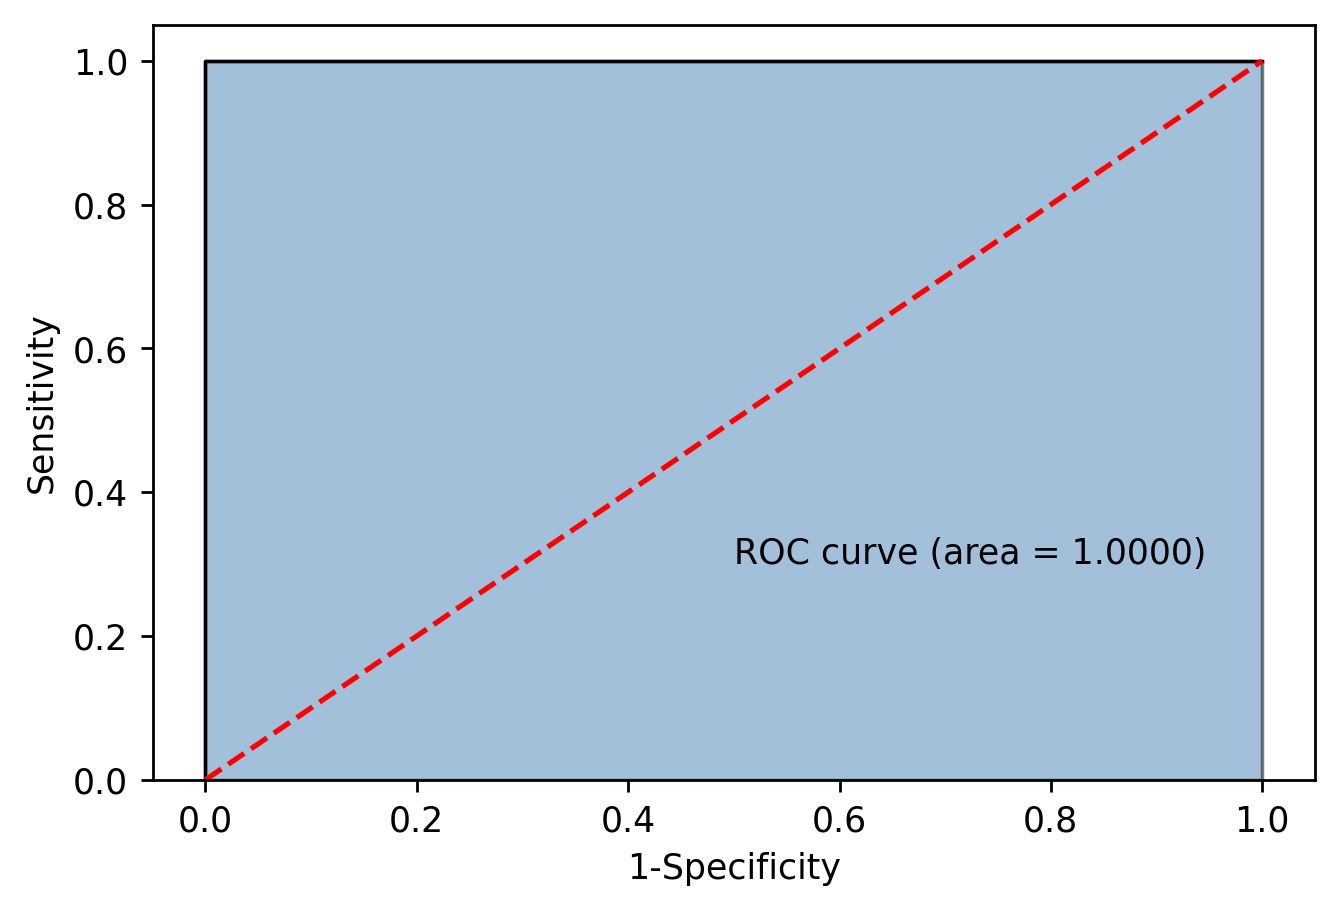

In [ ]:
P = vote2.predict_proba(x)[:, 1]
fpr,tpr,threshold = metrics.roc_curve(y,P)
# 计算AUC的值
roc_auc = metrics.auc(fpr,tpr)

#绘制面积图
plt.figure(figsize=(6,4),dpi=250)
plt.stackplot(fpr,tpr,color='steelblue',alpha=0.5,edgecolor='black')
# 添加边际线
plt.plot(fpr,tpr,color='black',lw=1)
# 添加对角线
plt.plot([0,1],[0,1],color='red',linestyle='--')
# 添加文本信息
plt.text(0.5,0.3,'ROC curve (area = %0.4f)' % roc_auc,fontsize=10)
# 添加x轴坐标与y轴坐标
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')

fpr,tpr,threshold = metrics.roc_curve(y,P)
# 计算AUC的值
print('AUC的值为：',roc_auc)
plt.savefig('./excel/result/3/AUC.png')
plt.show()

## 通过上面的实验，我们发现，模型预测效果好，泛化性强。由于训练数据较少，为了提高模型的训练泛化性已经鲁棒性，故此我们使用全部的数据集进行训练（原本只使用训练集）

In [ ]:
vote2 = VotingClassifier(estimators=[('LR', LR), ('Ada', Ada), ('GBDT', GBDT),
                                     ('SVC', svc), ('rf', rf),
                                     ('StackingClassifier', sclf),
                                     ('LGBMClassifier',lgb)],
                         voting='soft',
                         weights=weight)
vote2.fit(x,y)
y_predict = vote2.predict(x)

print('soft voting的综合表现:\n', metrics.accuracy_score(y, y_predict))
print()
print('soft voting的ROC面积：\n', roc_auc_score(y, y_predict))


soft voting的综合表现:
 1.0

soft voting的ROC面积：
 1.0


In [ ]:
data_pred = pd.read_excel('excel/extract/3/pred.xlsx')
data_pred = data_pred.fillna(0)
data_pred.head()

,Unnamed: 0,文物采样点,二氧化硅(SiO2),氧化钠(Na2O),氧化钾(K2O),氧化钙(CaO),氧化镁(MgO),氧化铝(Al2O3),氧化铁(Fe2O3),氧化铜(CuO),氧化铅(PbO),氧化钡(BaO),五氧化二磷(P2O5),氧化锶(SrO),氧化锡(SnO2),二氧化硫(SO2),量化风化,风化
0,0,A1,78.45,0.038650,0.409402,6.08,1.860000,7.23,2.150000,2.110000,0.020264,0.036171,1.06,0.03000,0.015512,0.510000,0,无风化
1,1,A2,37.75,0.062002,0.515894,7.63,0.089196,2.33,0.346143,0.292707,34.300000,0.557260,14.27,0.03702,0.016618,0.083158,1,风化
2,2,A3,31.95,0.373588,1.360000,7.19,0.810000,2.93,7.060000,0.210000,39.580000,4.690000,2.68,0.52000,0.212994,0.433418,0,无风化
3,3,A4,35.47,1.264156,0.790000,2.89,1.050000,7.07,6.450000,0.960000,24.280000,8.310000,8.45,0.28000,0.145549,0.590295,0,无风化
4,4,A5,64.29,1.200000,0.370000,1.64,2.340000,12.75,0.810000,0.940000,12.230000,2.160000,0.19,0.21000,0.490000,0.380000,1,风化


In [ ]:
x_pred = data_pred.loc[:, '二氧化硅(SiO2)':'量化风化']
print(x_pred)
print(x_pred.shape)

   二氧化硅(SiO2)  氧化钠(Na2O)  氧化钾(K2O)  氧化钙(CaO)  氧化镁(MgO)  氧化铝(Al2O3)  \
0       78.45   0.038650  0.409402      6.08  1.860000        7.23   
1       37.75   0.062002  0.515894      7.63  0.089196        2.33   
2       31.95   0.373588  1.360000      7.19  0.810000        2.93   
3       35.47   1.264156  0.790000      2.89  1.050000        7.07   
4       64.29   1.200000  0.370000      1.64  2.340000       12.75   
5       93.17   0.223500  1.350000      0.64  0.210000        1.52   
6       90.83   0.092727  0.980000      1.12  0.125788        5.06   
7       51.12   0.000000  0.230000      0.89  0.000000        2.12   

   氧化铁(Fe2O3)  氧化铜(CuO)   氧化铅(PbO)   氧化钡(BaO)  五氧化二磷(P2O5)  氧化锶(SrO)  \
0    2.150000  2.110000   0.020264   0.036171         1.06  0.030000   
1    0.346143  0.292707  34.300000   0.557260        14.27  0.037020   
2    7.060000  0.210000  39.580000   4.690000         2.68  0.520000   
3    6.450000  0.960000  24.280000   8.310000         8.45  0.280000   
4    0.81

In [ ]:
x_pred = tranfer.transform(x_pred)
print(x_pred.shape)

(8, 15)


In [ ]:
y_pred = vote2.predict(x_pred)
print(y_pred)
print(y_pred.shape)
print(sum(y_pred))
pred_label = []
for i in y_pred:
    if i == 0:
        pred_label.append('高钾')
    elif i==1:
        pred_label.append('铅钡')
print(pred_label)

[0 1 1 1 1 0 0 1]
(8,)
5
['高钾', '铅钡', '铅钡', '铅钡', '铅钡', '高钾', '高钾', '铅钡']


In [ ]:
data_pred['类型']=pred_label
data_pred['高钾概率的置信度']=vote2.predict_proba(x_pred)[:, 0]
data_pred['铅钡概率的置信度']=vote2.predict_proba(x_pred)[:, 1]
data_pred.to_excel('./excel/result/3/pred_result.xlsx')
data_pred

,Unnamed: 0,文物采样点,二氧化硅(SiO2),氧化钠(Na2O),氧化钾(K2O),氧化钙(CaO),氧化镁(MgO),氧化铝(Al2O3),氧化铁(Fe2O3),氧化铜(CuO),...,氧化钡(BaO),五氧化二磷(P2O5),氧化锶(SrO),氧化锡(SnO2),二氧化硫(SO2),量化风化,风化,类型,高钾概率的置信度,铅钡概率的置信度
0,0,A1,78.45,0.038650,0.409402,6.08,1.860000,7.23,2.150000,2.110000,...,0.036171,1.06,0.030000,0.015512,0.510000,0,无风化,高钾,0.743276,0.256724
1,1,A2,37.75,0.062002,0.515894,7.63,0.089196,2.33,0.346143,0.292707,...,0.557260,14.27,0.037020,0.016618,0.083158,1,风化,铅钡,0.105617,0.894383
2,2,A3,31.95,0.373588,1.360000,7.19,0.810000,2.93,7.060000,0.210000,...,4.690000,2.68,0.520000,0.212994,0.433418,0,无风化,铅钡,0.061193,0.938807
3,3,A4,35.47,1.264156,0.790000,2.89,1.050000,7.07,6.450000,0.960000,...,8.310000,8.45,0.280000,0.145549,0.590295,0,无风化,铅钡,0.054977,0.945023
4,4,A5,64.29,1.200000,0.370000,1.64,2.340000,12.75,0.810000,0.940000,...,2.160000,0.19,0.210000,0.490000,0.380000,1,风化,铅钡,0.114007,0.885993
5,5,A6,93.17,0.223500,1.350000,0.64,0.210000,1.52,0.270000,1.730000,...,0.172133,0.21,0.004691,0.057170,0.116229,1,风化,高钾,0.873886,0.126114
6,6,A7,90.83,0.092727,0.980000,1.12,0.125788,5.06,0.240000,1.170000,...,0.058125,0.13,0.001063,0.022810,0.110000,1,风化,高钾,0.860716,0.139284
7,7,A8,51.12,0.000000,0.230000,0.89,0.000000,2.12,0.000000,9.010000,...,11.340000,1.46,0.310000,0.000000,2.260000,0,无风化,铅钡,0.063219,0.936781
